### Analyzing the Stroop Effect

#### Background Information

**Statistics: The Science of Decisions.** In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Analyze the data in the *stroopdata.csv* file and perform appropriate statistical tests to draw decisive conclusions.

---

#### Initializing the libraries, dataset, and observations

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
#load dataframe
df = pd.read_csv('stroopdata.csv')

In [8]:
#check dataset and type
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


#### What is the independent variable? What is the dependent variable?

Independent variable is **congruency**, and the Dependent variable is **time**

---

#### What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

$H_{0} : T_{congruent} = T_{incongruent}$

$H_{1} : T_{congruent} < T_{incongruent}$

where $T_{congruent}$ is the mean time it takes to say the color when the color and word is congruent, and $T_{incongruent}$ is the mean time it takes to say the color when the color and word is incongruent.

Our null hypothesis begins with equivalence; we assume that there is no difference in the time it takes to say the color whether it is congruent or incongruent. Our alternative is what we want to prove, which is that it takes longer to say the color when the color and word is incongruent.

---

In [9]:
#sample size
sample_size = { "Congruent" : len(df['Congruent']), "Incongruent" : len(df['Incongruent']) }
sample_size

{'Congruent': 24, 'Incongruent': 24}

I propose performing a *paired T-Test*
- We are testing the means between two populations
- The sample's variances and distributions are not know in advance
- The sample size is less than 30
- We will use a paired test because observations in the congruent sample are paired with observations in the incongruent sample (we are observing how one person behaves under the two difference conditions)

---

In [10]:
df['TimeDifference'] = df['Congruent'] - df['Incongruent']
df.head()

,Congruent,Incongruent,TimeDifference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


#### Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [11]:
n = df.count()[0]
n

24

In [12]:
mean_congruent = df['Congruent'].mean()
mean_congruent

14.051125000000004

In [13]:
mean_incongruent = df['Incongruent'].mean()
mean_incongruent

22.01591666666667

In [14]:
df['TimeDifference'].mean()

-7.964791666666667

In [15]:
df['TimeDifference'].std()

4.864826910359056

Basic statistical observations:
- The mean time for congruent and incongruent is 14.051 seconds and 22.016 seconds respectively.
- Further statistics reveal the observed mean difference and standard deviation to to be -7.965 seconds and 4.865 seconds respectively.

---

#### Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

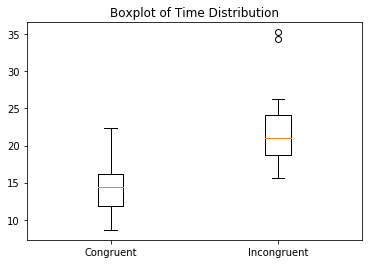

In [16]:
plt.boxplot([df['Congruent'], df['Incongruent']]);
plt.xticks([1,2], ['Congruent', 'Incongruent']);
plt.title('Boxplot of Time Distribution');

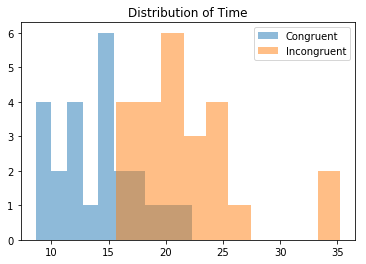

In [17]:
plt.hist(df['Congruent'], alpha=.5);
plt.hist(df['Incongruent'], alpha=.5);
plt.legend(["Congruent", "Incongruent"]);
plt.title('Distribution of Time');

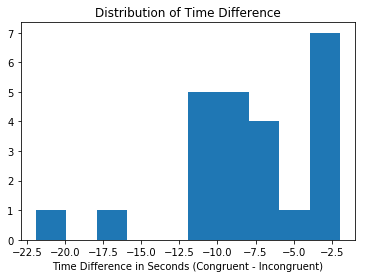

In [18]:
plt.hist(df['TimeDifference']);
plt.title('Distribution of Time Difference');
plt.xlabel('Time Difference in Seconds (Congruent - Incongruent)');

Observations:
- The distributions show that mean times for congruent is less than the mean times for incongruent
- Similarly, we observe that all our results for the time difference are negative, meaning that for each test, it took people more time to read the incongruent words than congruent words.
---

#### Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

We will performed a paired T-Test, finding the mean of the time differences between each congruent and incongruent samples. We will compute these robustly as well as with the scipy.stats class.

In [19]:
#1. Calculate the mean of the differences
mean_diff = df['TimeDifference'].mean()
mean_diff

-7.964791666666667

In [20]:
#2. Calculate the standard error of the mean differences
df['TimeDifference'].std(), n**.5

(4.864826910359056, 4.8989794855663558)

In [21]:
se_diff = df['TimeDifference'].std() / n**.5
se_diff

0.99302863477834058

In [22]:
#3. Calculate t-value
t_val = mean_diff / se_diff
t_val

-8.020706944109957

With a 23df T-Test, a p-value .0005 generates requires T-value of at least 3.768. Our T-value of 8.021 exceeds the 99.9% confidence level of the statistic falling outside the null hypothesis. Now I will find the T-value and p-value using the scipy.stats class.

In [23]:
#Find t-statistic and p-value using scipy.stats class
t_stat = stats.ttest_rel(df['Congruent'], df['Incongruent'])
t_stat

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [24]:
#p-value
t_stat.pvalue

4.1030005857111781e-08

---
#### Conclusions

Using the one-tail T-Test with n=24 (23df), our T-statistic is 8.021, which far exceeds the criticial value of 3.768. This gives us a p-value of less than .0001 (.00000004 to be precise), so we have a greater than 99.99% likelihood that our statistic fails outside the null hypothesis, so *we will strongly reject the null hypothesis.*

This is not surprising to discover, as it is intuitive to think that it would take longer for the mind to the incongruent words (a word of a color whose color was a different color than the word itself). This mind-trick test performed as I would have expected.

---
Resources Acknowledged:

- Computing T-Test Scores: https://www.universalclass.com/articles/math/statistics/student-t-tests-ii.htm
- T-Test Table: http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
- Standard Errors: http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/what-is-the-standard-error-of-the-mean/